In [25]:

#Import libraries:
import pandas as pd
import numpy as np
import os
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = (16, 8)
import matlab.engine


In [26]:
os.getcwd()
os.chdir('/Users/sitani/Desktop/CS_final_codes/workonhotspots/')
eng = matlab.engine.start_matlab()
eng.reading_hotspot2Data_v3(nargout=0)
os.chdir('/Users/sitani/Desktop/CS_final_codes/workonhotspots/FinalCodesForPublication/')
os.getcwd()

'/Users/sitani/Desktop/CS_final_codes/workonhotspots/FinalCodesForPublication'

In [27]:
eng.quit()

In [28]:
X=pd.read_csv('Atrain_whole.csv',header=None)
y=pd.read_csv('label_whole.csv',header=None)

X_train = pd.read_csv('Atrain2.csv',header=None)
X_valid = pd.read_csv('Avalid2.csv',header=None)

y_train=pd.read_csv('label_train2.csv',header=None)
y_valid=pd.read_csv('label_valid2.csv',header=None)

X_test=pd.read_csv('Atest2.csv',header=None)
y_test=pd.read_csv('label_test2.csv',header=None)

X_train=X_train.T#transpose
X_valid=X_valid.T
X=X.T
X_test=X_test.T

y_train=y_train.values.ravel()
y_valid=y_valid.values.ravel()
y=y.values.ravel()
y_test=y_test.values.ravel()

print(X_train.shape)
print(X_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(250, 58)
(63, 58)
(250,)
(63,)


In [29]:
def modelfit(alg, train_data,train_labels, predictors,performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(train_data,train_labels)
        
    #Predict training set:
    train_predictions = alg.predict(train_data)
    train_predprob = alg.predict_proba(train_data)[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg,train_data,train_labels,cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(train_labels, train_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(train_labels, train_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_,predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
    #print (train_predictions)     


Model Report
Accuracy : 1
AUC Score (Train): 1.000000
CV Score : Mean - 0.7040994 | Std - 0.06791092 | Min - 0.5709877 | Max - 0.7521368


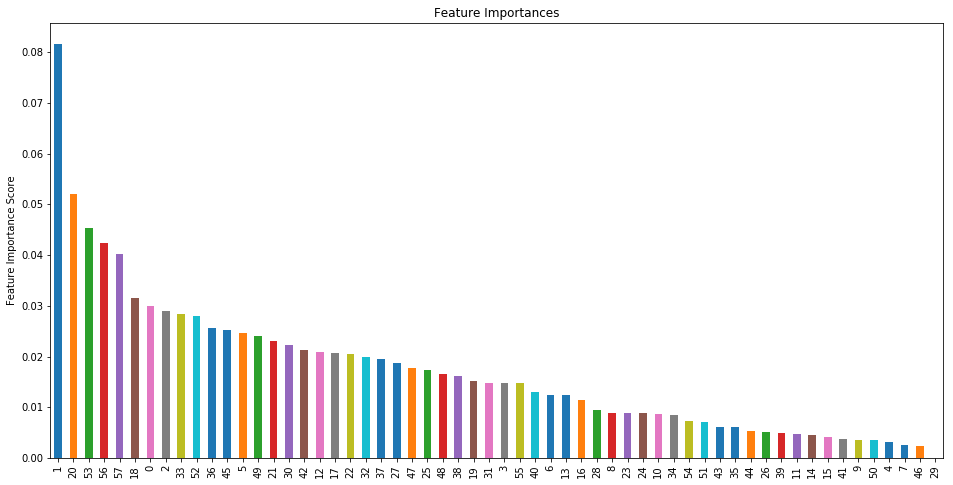

In [30]:
#Choose all predictors except target & IDcols
predictors = [x for x in X.columns]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0,X,y,predictors )


In [68]:
#Choose all predictors except target & IDcols
predictors = [x for x in X.columns]
param_test1 = {'n_estimators':np.arange(10,1000,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, min_samples_split=2,min_samples_leaf=25,max_depth=5,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X,y)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, loss='deviance', max_depth=5,
              max_features=15, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=25, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': array([ 10,  20, ..., 980, 990])},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [69]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.70177, std: 0.07513, params: {'n_estimators': 10},
  mean: 0.72611, std: 0.07255, params: {'n_estimators': 20},
  mean: 0.72384, std: 0.05834, params: {'n_estimators': 30},
  mean: 0.72972, std: 0.06973, params: {'n_estimators': 40},
  mean: 0.73143, std: 0.06339, params: {'n_estimators': 50},
  mean: 0.72270, std: 0.06630, params: {'n_estimators': 60},
  mean: 0.71992, std: 0.06749, params: {'n_estimators': 70},
  mean: 0.72013, std: 0.05988, params: {'n_estimators': 80},
  mean: 0.72312, std: 0.05734, params: {'n_estimators': 90},
  mean: 0.72846, std: 0.05765, params: {'n_estimators': 100},
  mean: 0.72416, std: 0.06083, params: {'n_estimators': 110},
  mean: 0.72606, std: 0.06179, params: {'n_estimators': 120},
  mean: 0.73209, std: 0.06139, params: {'n_estimators': 130},
  mean: 0.73467, std: 0.05917, params: {'n_estimators': 140},
  mean: 0.73579, std: 0.05640, params: {'n_estimators': 150},
  mean: 0.73086, std: 0.05504, params: {'n_estimators': 160},
  mean: 0.73171, 

In [70]:
#param_test2 = {'max_depth':np.arange(5,16,2), 'min_samples_split':np.arange(2,11,1)}
param_test2 = {'max_depth':np.arange(1,100,1)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=150, max_features='sqrt', subsample=0.8, min_samples_split=2,min_samples_leaf=25,random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X,y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.75462, std: 0.06743, params: {'max_depth': 1},
  mean: 0.73435, std: 0.08690, params: {'max_depth': 2},
  mean: 0.72005, std: 0.06242, params: {'max_depth': 3},
  mean: 0.72869, std: 0.08195, params: {'max_depth': 4},
  mean: 0.73579, std: 0.05640, params: {'max_depth': 5},
  mean: 0.73115, std: 0.06989, params: {'max_depth': 6},
  mean: 0.73115, std: 0.06989, params: {'max_depth': 7},
  mean: 0.73115, std: 0.06989, params: {'max_depth': 8},
  mean: 0.73115, std: 0.06989, params: {'max_depth': 9},
  mean: 0.73115, std: 0.06989, params: {'max_depth': 10},
  mean: 0.73115, std: 0.06989, params: {'max_depth': 11},
  mean: 0.73115, std: 0.06989, params: {'max_depth': 12},
  mean: 0.73115, std: 0.06989, params: {'max_depth': 13},
  mean: 0.73115, std: 0.06989, params: {'max_depth': 14},
  mean: 0.73115, std: 0.06989, params: {'max_depth': 15},
  mean: 0.73115, std: 0.06989, params: {'max_depth': 16},
  mean: 0.73115, std: 0.06989, params: {'max_depth': 17},
  mean: 0.73115, std: 0


Model Report
Accuracy : 0.9169
AUC Score (Train): 0.968630
CV Score : Mean - 0.7546217 | Std - 0.06743167 | Min - 0.6399177 | Max - 0.8504274


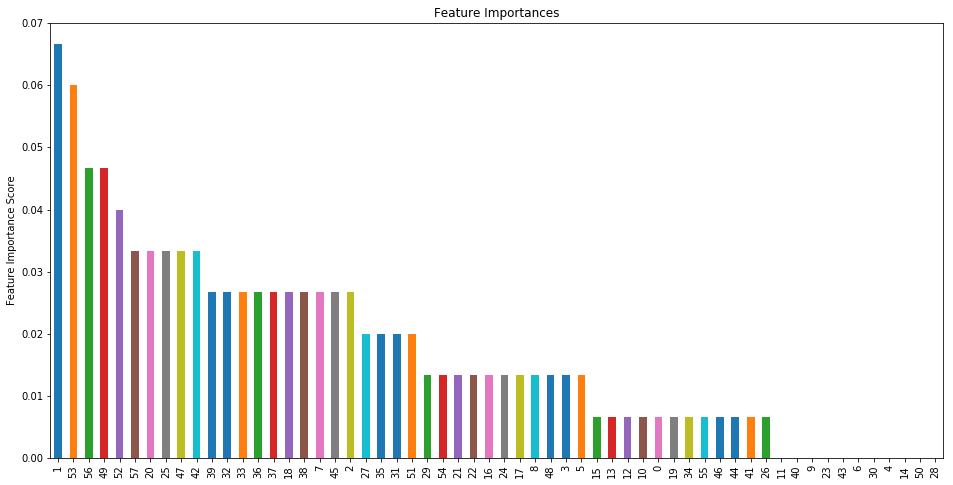

In [71]:
modelfit(gsearch2.best_estimator_, X,y,predictors)

In [72]:
param_test3 = {'min_samples_split':np.arange(2,5,1), 'min_samples_leaf':np.arange(1,60,1)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=150,max_depth=1,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(X,y)
#gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_
gsearch3.best_params_, gsearch3.best_score_


({'min_samples_leaf': 35, 'min_samples_split': 2}, 0.7728949034504591)


Model Report
Accuracy : 0.9169
AUC Score (Train): 0.968630
CV Score : Mean - 0.7546217 | Std - 0.06743167 | Min - 0.6399177 | Max - 0.8504274


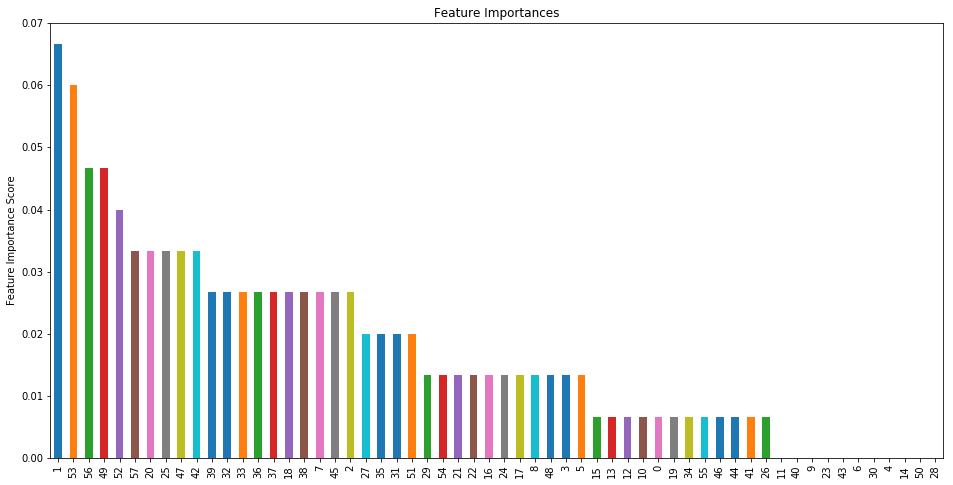

In [74]:
modelfit(gsearch2.best_estimator_, X,y,predictors)

In [75]:
param_test4 = {'max_features':np.arange(1,59,1)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=150,max_depth=1, min_samples_split=2, min_samples_leaf=35, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(X,y)
#gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_
gsearch4.best_params_, gsearch4.best_score_

({'max_features': 13}, 0.77514245014245)


Model Report
Accuracy : 0.9233
AUC Score (Train): 0.976859
CV Score : Mean - 0.7468107 | Std - 0.0701918 | Min - 0.622428 | Max - 0.840812


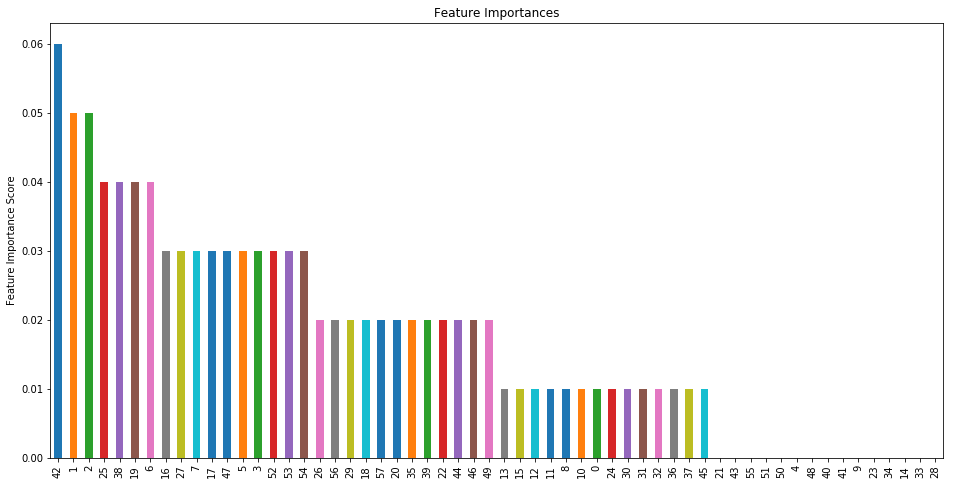

In [57]:
modelfit(gsearch2.best_estimator_, X,y,predictors)

In [76]:
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9,0.95]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=150,max_depth=1, min_samples_split=2, min_samples_leaf=35, subsample=0.8,max_features=13, random_state=10),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(X,y)
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.74776, std: 0.06305, params: {'subsample': 0.6},
  mean: 0.76138, std: 0.05157, params: {'subsample': 0.7},
  mean: 0.77183, std: 0.07381, params: {'subsample': 0.75},
  mean: 0.77514, std: 0.07237, params: {'subsample': 0.8},
  mean: 0.75563, std: 0.05332, params: {'subsample': 0.85},
  mean: 0.76351, std: 0.05427, params: {'subsample': 0.9},
  mean: 0.74312, std: 0.06910, params: {'subsample': 0.95}],
 {'subsample': 0.8},
 0.77514245014245)

In [119]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
#import pdb
#pdb.set_trace()
#gbm_tuned_1= GradientBoostingClassifier(criterion='friedman_mse', init=None,
 #             learning_rate=0.2, n_estimators=80,max_depth=5,min_samples_split=11,min_samples_leaf=4, subsample=0.8, random_state=10, 
  #                                max_features=7,warm_start=False)
gbm_tuned_1= GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.2, n_estimators=290,max_depth=1, min_samples_split=2,min_samples_leaf=31, subsample=0.8, random_state=10, 
                                  max_features=15,warm_start=False)

#gbm_tuned_1=GradientBoostingClassifier(random_state=10) gives poorer results than tuned gbm
Acc=cross_val_score(gbm_tuned_1, X, y, scoring='accuracy',
          cv=5)
 
print('Accuracy: %.3f' % Acc.mean() )

Sen=cross_val_score(gbm_tuned_1, X, y, scoring='recall',
          cv=5)
Sen.mean()  
print('Sensitivity: %.3f' % Sen.mean() )
Prec=cross_val_score(gbm_tuned_1, X, y, scoring='precision',
          cv=5)
Prec.mean()  
print('Prec: %.3f' % Prec.mean() )
F1=cross_val_score(gbm_tuned_1, X, y, scoring='f1',
          cv=5)
F1.mean()  
print('F1: %.3f' % F1.mean() )
AUC=cross_val_score(gbm_tuned_1, X, y, scoring='roc_auc',
          cv=5)
AUC.mean()  
print('AUC: %.3f' % AUC.mean() )

Accuracy: 0.713
Sensitivity: 0.662
Prec: 0.666
F1: 0.659
AUC: 0.750


In [117]:
#'accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score',
#'average_precision', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 
#'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score',
#'mutual_info_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_squared_error',
#'neg_mean_squared_log_error', 'neg_median_absolute_error', 'normalized_mutual_info_score', 'precision', 
#'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 
#'r2', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'v_measure_score'

In [118]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
import math

def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]

scoring = {'tp': make_scorer(tp), 'tn': make_scorer(tn),
           'fp': make_scorer(fp), 'fn': make_scorer(fn)}
cv_results = cross_validate(gbm_tuned_1.fit(X, y), X, y,
                           scoring=scoring, cv=5)
tp=cv_results['test_tp'].mean()
fp=cv_results['test_fp'].mean()
tn=cv_results['test_tn'].mean()
fn=cv_results['test_fn'].mean()
print('tp: %.3f' % tp)
print('\n')
print('tn: %.3f' % tn)
print('\n')
print('fp: %.3f' % fp)
print('\n')
print('fn: %.3f' % fn)
print('\n')

specificity=tn/(tn+fp)
print('Specificity: %.3f' %specificity)

MCC= (tp*tn-fp*fn)/(math.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
print('MCC:%.3f' %MCC)

tp: 16.200


tn: 26.200


fp: 9.800


fn: 10.400


Specificity: 0.728
MCC:0.338


In [114]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

predictors = [x for x in X.columns]
#gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.2, n_estimators=40, max_features=55, subsample=0.7,max_depth=5,min_samples_split=12,min_samples_leaf=5, random_state=10,warm_start=False)
gbm_tuned_1= GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.25, n_estimators=1500,max_depth=1, min_samples_split=2,min_samples_leaf=31, subsample=0.9, random_state=10, 
                                  max_features=7,warm_start=False)




gbm_tuned_1.fit(X,y)


y_test_pred = gbm_tuned_1.predict(X_test) 
svm_roc_auc = roc_auc_score(y_test, y_test_pred)

In [115]:
from sklearn.metrics import confusion_matrix 
print('Accuracy of GTB classifier: {:.2f}'.format(gbm_tuned_1.score(X_test, y_test)))
print('\n')
confusion_df = pd.DataFrame(confusion_matrix(y_test,y_test_pred),
             columns=["Predicted Class " + str(class_name) for class_name in [1,0]],
             index = ["Class " + str(class_name) for class_name in [1,0]])

print('Confusion matrix : \n',confusion_df.T)
print('\n')


cm1 = confusion_matrix(y_test, y_test_pred).T
print('\n')
total1=sum(sum(cm1))
print(cm1)
#####from confusion matrix calculate sensitivity specificity

tn=confusion_matrix(y_test, y_test_pred)[0, 0]
fp=confusion_matrix(y_test, y_test_pred)[0, 1]
fn=confusion_matrix(y_test, y_test_pred)[1, 0]
tp=confusion_matrix(y_test, y_test_pred)[1, 1]
#sensitivity1=tp/(tp+fn)

#print('Sensitivity :', sensitivity1 )
#print('\n')

specificity=tn/(tn+fp)
print('Specificity :', specificity1)
print('\n')
#precision=tp/(tp+fp)
#precision = cm1[0,0]/(cm1[0,0]+cm1[0,1])
#print('precision :', precision)
#print('\n')
from sklearn.metrics import precision_score
print("Precision score: {}".format(precision_score(y_test,y_test_pred)))
print('\n')
from sklearn.metrics import recall_score
print("Recall or Sensitivity: {}".format(recall_score(y_test,y_test_pred)))
print('\n')
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test,y_test_pred)))
print('\n')
from sklearn.metrics import matthews_corrcoef
print("Matthews Correlation Coefficient: {}".format(matthews_corrcoef(y_test, y_test_pred)))
print('\n')
##Area under Curve-AUC
auc = roc_auc_score(y_test, gbm_tuned_1.predict_proba(X_test)[:,1])
print('AUC: %.3f' % auc)
print('\n')

Accuracy of GTB classifier: 0.71


Confusion matrix : 
                    Class 1  Class 0
Predicted Class 1       64       13
Predicted Class 0       23       26




[[64 13]
 [23 26]]
Specificity : 0.6153846153846154


Precision score: 0.5306122448979592


Recall or Sensitivity: 0.6666666666666666


F1 Score: 0.5909090909090909


Matthews Correlation Coefficient: 0.3815024391289687


AUC: 0.714


